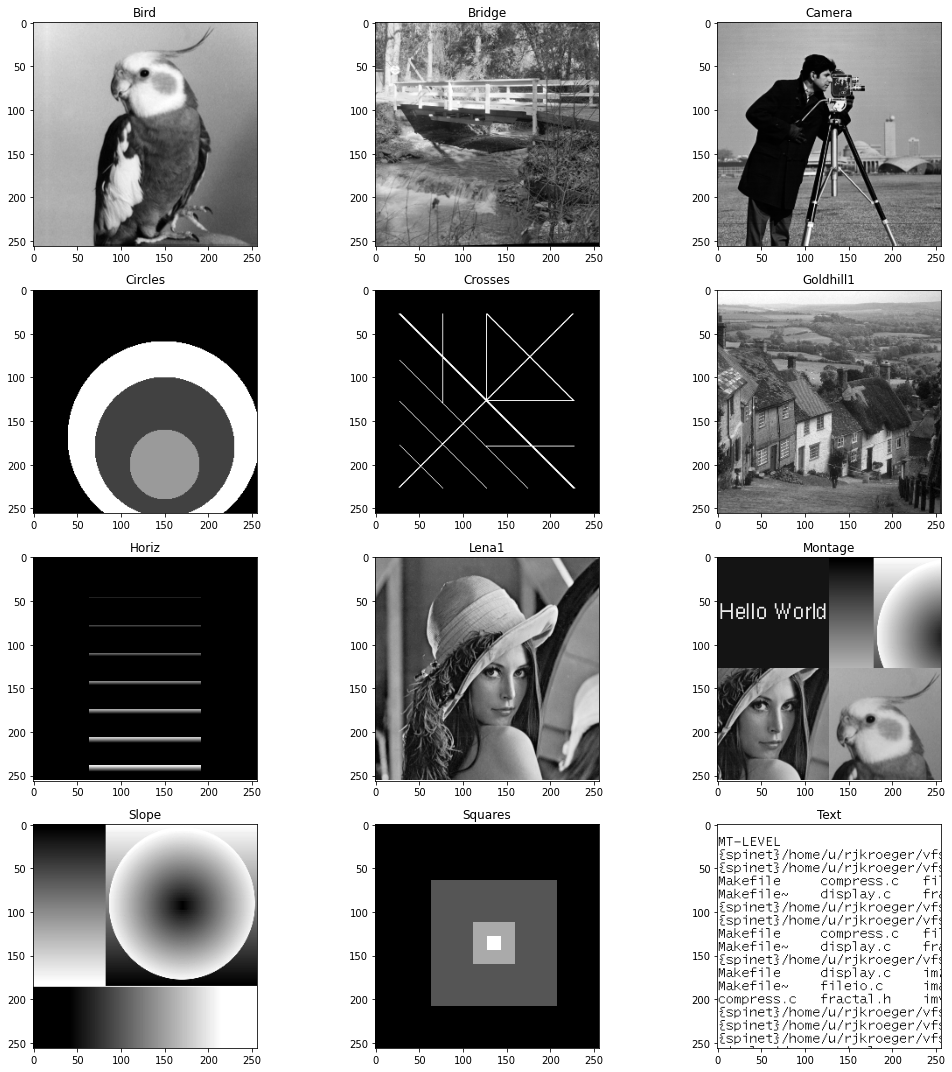

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    ax[imInd // 3, imInd % 3].imshow(np.array(im), cmap='gray')
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()




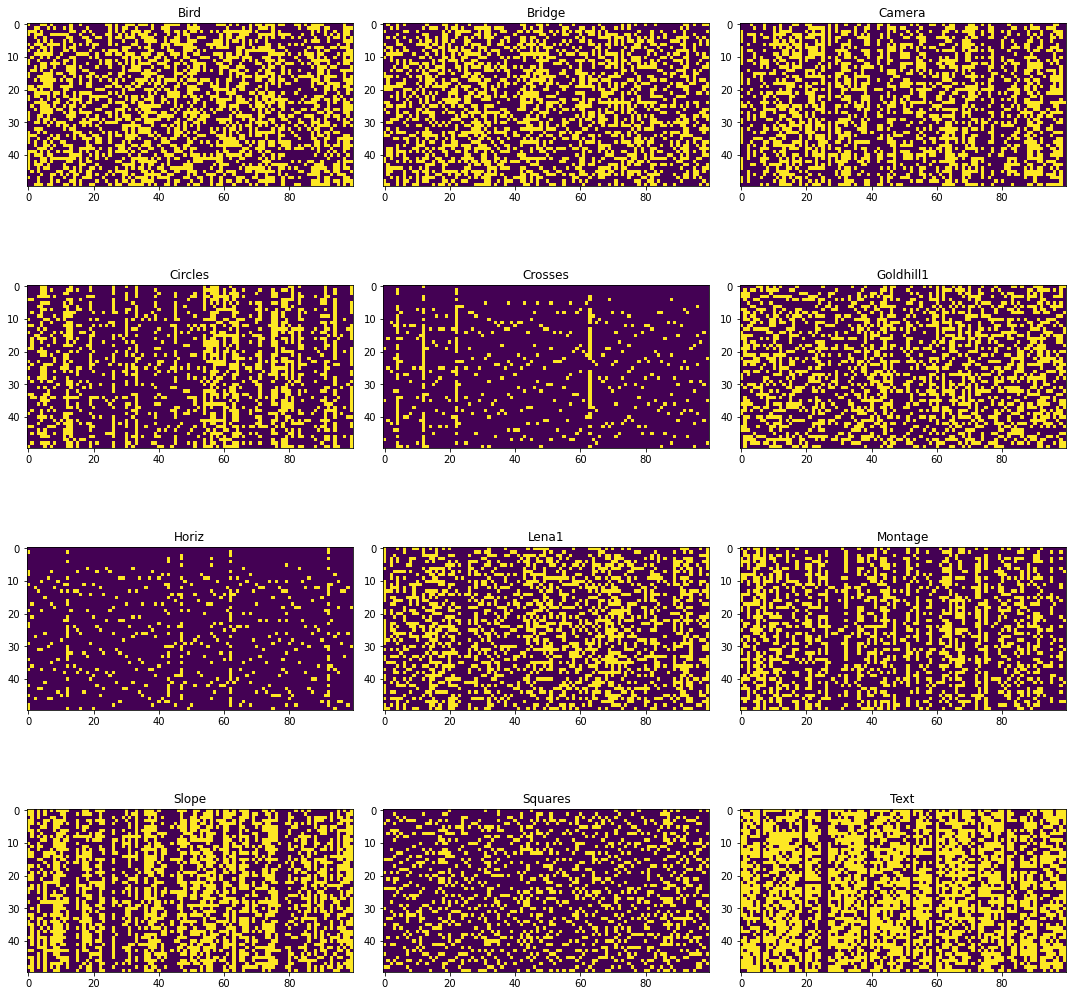

In [3]:
import torch
from encoding import TTFSEncoder, PoissonEncoder, PositionalEncoder
# image_size = 20
# encoder = NumericEncoder(7, image_size, std=10, padding=10)
# data = torch.tensor([[200, 50, 3, 44, 180],
#                      [40, 150, 32, 4, 80],
#                      [45, 40, 120, 100, 10],])

# print('pooled: ', encoder.pool(data, image_size, 'avg'))
# encoded = encoder(data)

# print(len(encoded), encoded)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

encoder = PoissonEncoder(50, 100)

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    
    encoded = encoder(data=np.array(im), pooling='random')
    # print(encoded)

    ax[imInd // 3, imInd % 3].imshow(encoded)
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()



1100xBatch: 1/1 (100%) 5127.245ms


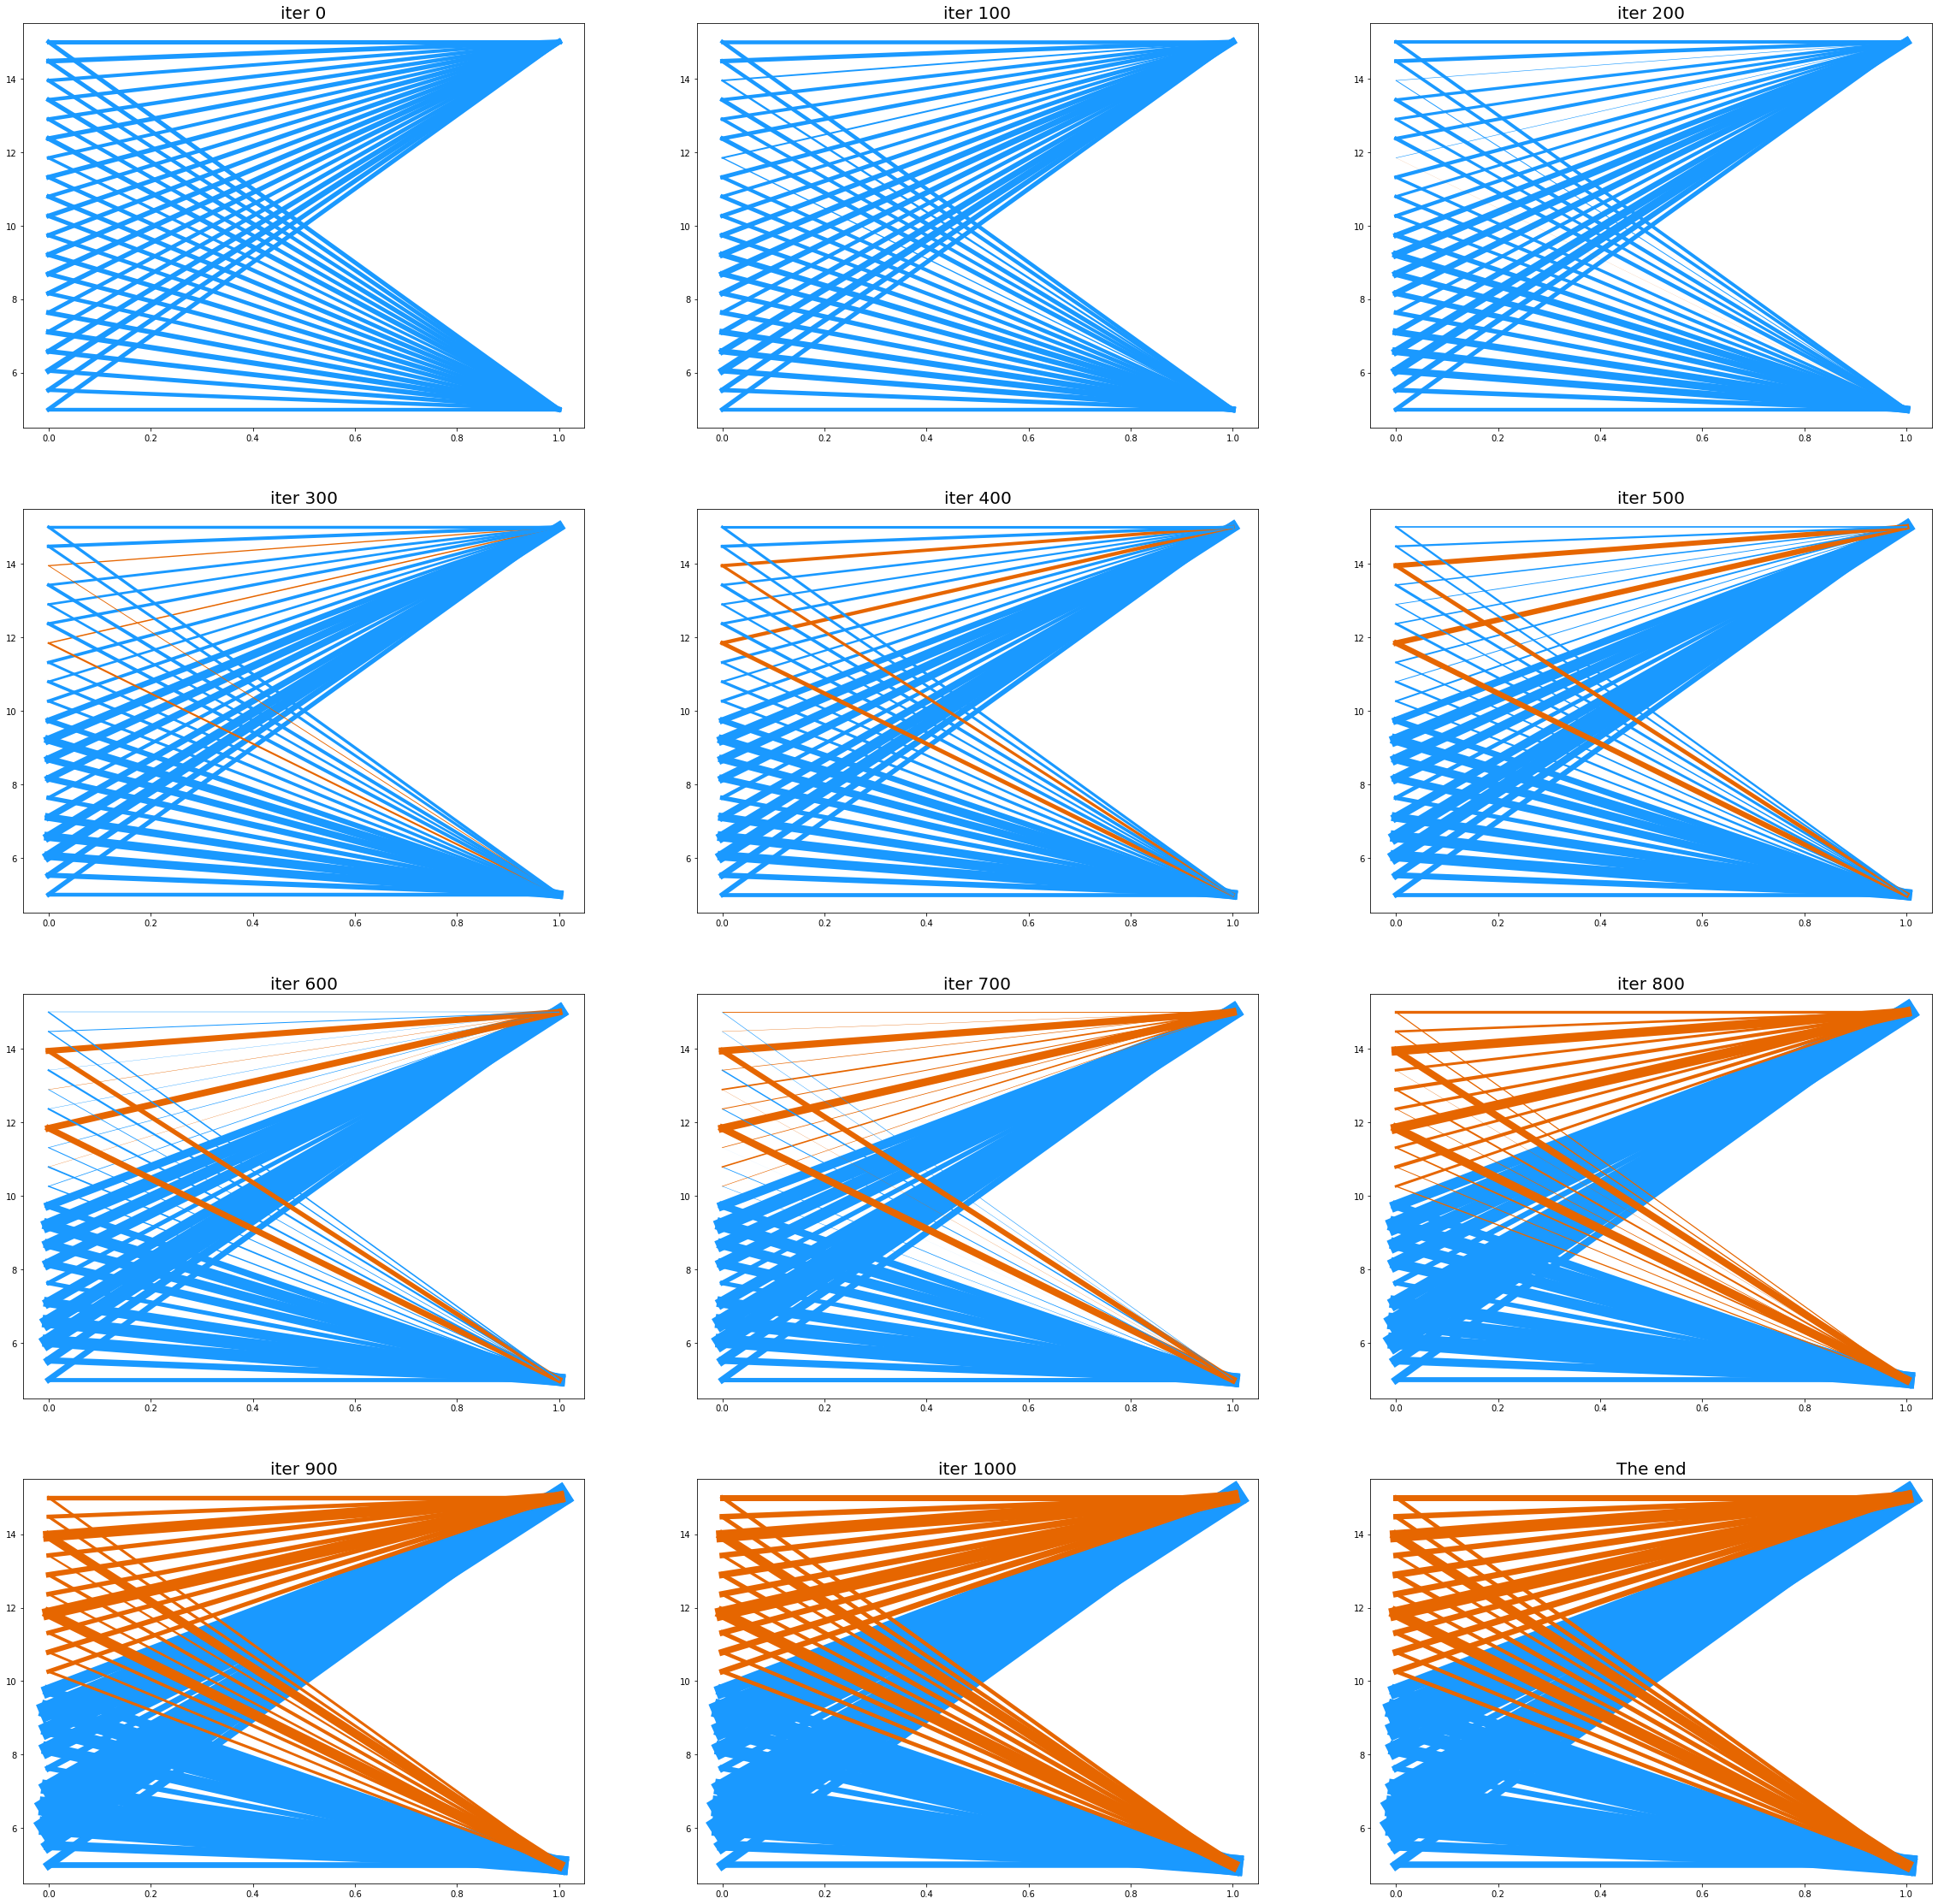

torch.Size([2422, 2])
torch.Size([786, 2])
20xBatch: 1/1 (100%) 196.185ms
similarity: 0.9963020086288452


In [15]:
# from experiment import learnSTDP
from stdp import STDP
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from metrics import weights_similarity

im2 = np.array(Image.open(f'images/crosses.tif'))
im1 = np.array(Image.open(f'images/lena1.tif'))
model = STDP(syn_params={'w_mean': 50, 'flat': True, 'trace_dur': 10}, N=20, fix_image=True)

result = model.learn(im1, im2, intersection=0, image_dur=15, image_sleep=5, iters=1100, inp_amp=500, verbose=0, encoding='poisson', W_changes_step=100)
plt.show()
print(model.ng_inp['spike', 0].shape)
print(model.ng_out['spike', 0].shape)

ng_inp, ng_out = model.test()

# Similarity
print(f"similarity: {weights_similarity(model.syn.W)}")

torch.Size([53, 2])
tensor([[ 5,  0],
        [ 5,  1],
        [ 6,  0],
        [ 6,  1],
        [ 8,  0],
        [ 8,  1],
        [ 9,  0],
        [ 9,  1],
        [10,  0],
        [10,  1],
        [11,  0],
        [11,  1],
        [12,  0],
        [12,  1],
        [13,  0],
        [13,  1],
        [14,  0],
        [14,  1],
        [15,  0],
        [15,  1],
        [16,  0],
        [16,  1],
        [17,  0],
        [17,  1],
        [18,  0],
        [18,  1],
        [20,  0],
        [20,  1]])


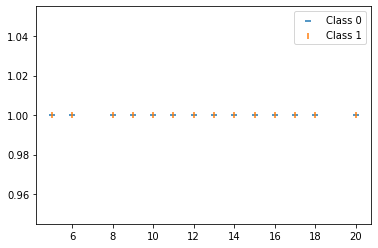

In [4]:
import torch
zeros = ng_out['spike', 0][:, 1] == 0
plt.scatter(x=ng_out['spike', 0][zeros][:, 0], y=torch.ones(zeros.sum()), marker='_')
plt.scatter(x=ng_out['spike', 0][~zeros][:, 0], y=torch.ones((~zeros).sum()), marker='|')
plt.legend(['Class 0', 'Class 1'])

